# Settings

## Package Loading

In [1]:
%matplotlib inline
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
import torch

## Toy Data

In [2]:
x = np.linspace(0,10,100)

In [3]:
def fx(x):
    return(x**3)

# ↓ After Differentiation

def derivative(x):
    return(3 * x**2)

In [4]:
y = derivative(x)

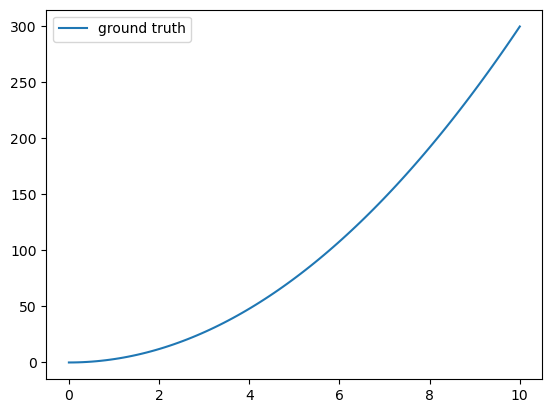

In [5]:
plt.plot(x, y, "-", label="ground truth")
plt.legend()

# Symbolic Differentiation 

## Step.1: Define Variables

In [6]:
x_symbol = sy.Symbol('x')
x_symbol

x

## Step.2: Perform Symbolic Differentiation

In [7]:
derivative_symbol = sy.diff(x_symbol**3, x_symbol)
derivative_symbol

3*x**2

## Step.3: Evaluation (Symbol → Function)

In [8]:
y_symbol = np.array([derivative_symbol.subs(x_symbol, z) for z in x])

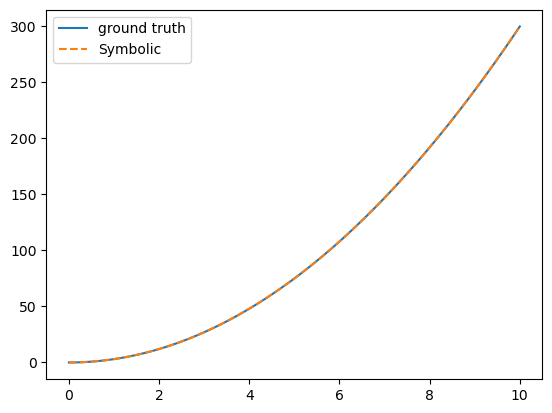

In [9]:
plt.plot(x, y, "-", label="ground truth")
plt.plot(x, y_symbol, "--", label="Symbolic")
plt.legend()

# Numeric Differentiation

In [10]:
y_numeric = np.gradient(x**3, x)

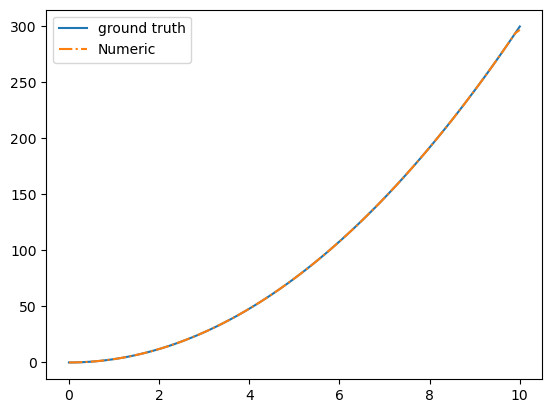

In [11]:
plt.plot(x, y, "-", label="ground truth")
plt.plot(x, y_numeric, "-.", label="Numeric")
plt.legend()

# Automatic Differentiation

In [12]:
y_torch = np.zeros(100)
for i in range(0, 100):
	x_torch = torch.tensor(x[i], requires_grad=True)
	fx_torch = fx(x_torch)
	fx_torch.backward()
	y_torch[i] = x_torch.grad

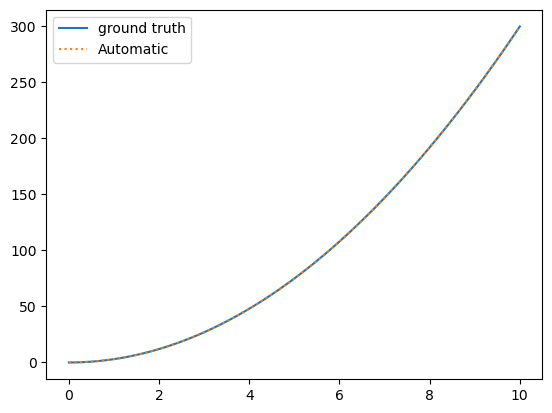

In [13]:
plt.plot(x, y, "-", label="ground truth")
plt.plot(x, y_torch, ":", label="Automatic")
plt.legend()

# All Results

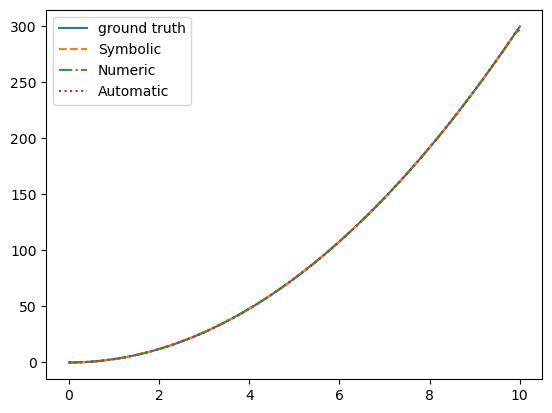

In [14]:
plt.plot(x, y, "-", label="ground truth")
plt.plot(x, y_symbol, "--", label="Symbolic")
plt.plot(x, y_numeric, "-.", label="Numeric")
plt.plot(x, y_torch, ":", label="Automatic")
plt.legend()